# Implementación de dataset y definición de funciones

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
# Cambiar el directorio de trabajo a la carpeta específica
os.chdir("/content/drive/MyDrive/Reconocimiento de Patrones")

In [ ]:
!pip install wfdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 1.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz, find_peaks, hilbert, welch, find_peaks
from scipy.integrate import cumtrapz
from scipy.stats import linregress
from numpy.fft import fft, fftfreq
import pywt
import os
from scipy.signal import find_peaks, butter, filtfilt


def butter_bandpass(lowcut, highcut, fs, order=5, filter_type = "band"):
    return butter(order, [lowcut, highcut], fs=fs, btype=filter_type)

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5, filter_tp = "band"):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order, filter_type = filter_tp)
    w, h = freqz(b, a, fs=fs, worN=2000)
    y = lfilter(b, a, data)
    return y,w,h

def butter_lowpass_filter(data, cutoff, fs, order):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

def fft(x,fs = None,n = None):
    X = np.fft.fftshift(np.fft.fft(x,n))
    N = len(X)
    k = np.arange(N)
    w = 2*np.pi*k/N
    w = np.fft.fftshift(w)
    w = np.unwrap(w - 2*np.pi)
    if fs != None:
        f = w*fs/(2*np.pi)
        return X,f,w
    else:
        return X,w

def extraer_nombres_archivos_dat(directorio):
    # Lista para almacenar los nombres de los archivos
    nombres_archivos_dat = []

    # Recorrer el directorio
    for raiz, dirs, archivos in os.walk(directorio):
        for archivo in archivos:
            # Verificar si el archivo termina con '.dat'
            if archivo.endswith('.dat'):
                nombres_archivos_dat.append(archivo[:-4])
    return nombres_archivos_dat

# Cambia 'file_path' por la ruta de tu archivo
file_path = './dataset/waves/'

names = extraer_nombres_archivos_dat(file_path)


# Analisis descriptivo

Patient12_Study02_LMCA_2
Patient10_Study02_LMCA_4
Patient12_Study02_LMCA_1
Patient12_Study04_LMCA_1
Patient12_Study04_LMCA_2
Patient12_Study03_LMCA_3
Patient12_Study04_LMCA_3
Patient10_Study03_LMCA_1
Patient13_Study01_LMCA_5
Patient10_Study02_LMCA_5
Patient10_Study03_LMCA_3
Patient10_Study02_LMCA_2
Patient10_Study02_LMCA_3
Patient10_Study03_LMCA_2
Patient10_Study01_LMCA_1
Patient13_Study01_RMCA_1
Patient10_Study02_LMCA_1
Patient10_Study03_LMCA_4
Patient12_Study03_LMCA_4
Patient12_Study03_LMCA_1
Patient13_Study02_LMCA_1
Patient18_Study02_LMCA_3
Patient01_Study02c_LMCA_5
Patient18_Study02_LMCA_2
Patient01_Study04_LMCA_2
Patient14_Study03_LMCA_1
Patient13_Study04_LMCA_1
Patient13_Study02_RMCA_1
Patient01_Study01_RMCA_3
Patient01_Study02d_LMCA_1
Patient14_Study02_RMCA_3
Patient14_Study01_RMCA_1
Patient01_Study02b_LMCA_4
Patient01_Study01_RMCA_1
Patient01_Study11_RMCA_2
Patient14_Study02_RMCA_2
Patient13_Study03_RMCA_2
Patient14_Study04_RMCA_2
Patient01_Study03_LMCA_3
Patient13_Study04_RMCA

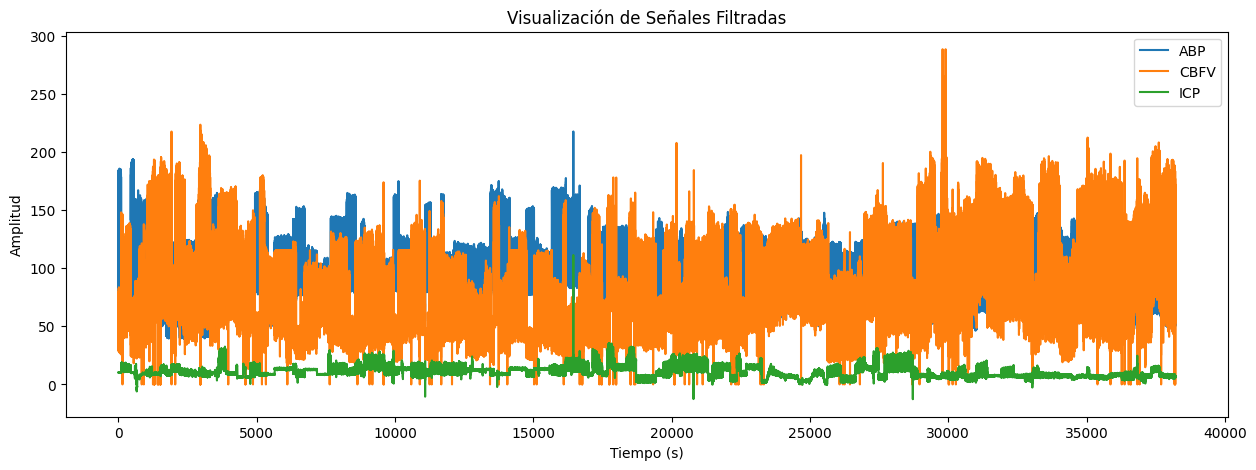

In [ ]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt

# Definición de las funciones de análisis descriptivo (añadir las funciones de análisis aquí).

# Preparación de las señales
path = './dataset/waves/'

signals = {"ABP": [], "CBFV": [], "ICP": []}
for record_name in names:
    print(record_name)
    record = wfdb.rdrecord(path + record_name)
    titles = record.sig_name
    sig_dict = {titles[i]: record.p_signal[:, i] for i in range(len(titles))}

    # Asigna cada señal completa a su respectivo contenedor en el diccionario
    for key in signals.keys():
        if key in sig_dict:
            signals[key].extend(sig_dict[key])

# Convertir listas a arrays de numpy para facilitar el análisis
for key in signals.keys():
    signals[key] = np.array(signals[key])

# Visualización simple de las señales (opcional)
t = np.arange(0, len(signals["ABP"]) / record.fs, 1 / record.fs)
plt.figure(figsize=(15, 5))
plt.plot(t, signals["ABP"], label="ABP")
plt.plot(t, signals["CBFV"], label="CBFV")
plt.plot(t, signals["ICP"], label="ICP")
plt.legend()
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Visualización de Señales Filtradas")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_univariate_time_series(signals):
    for signal_name, values in signals.items():
        data = pd.Series(values)

        # Calculamos estadísticas descriptivas
        stats = data.describe()
        print(f"Estadísticas Descriptivas para {signal_name}:\n{stats}\n")

        # Generamos histograma
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        sns.histplot(data, kde=True, color='skyblue')
        plt.title(f'Histograma de {signal_name}')
        plt.xlabel('Valor')
        plt.ylabel('Frecuencia')

        # Generamos boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=data, color='lightgreen')
        plt.title(f'Boxplot de {signal_name}')
        plt.xlabel('Valor')

        plt.tight_layout()
        plt.show()


def analyze_multivariate_time_series(signals):
    data = pd.DataFrame(signals)

    # Calculamos la matriz de correlación
    correlation_matrix = data.corr()
    print("Matriz de Correlación:\n", correlation_matrix)

    # Visualización de la matriz de correlación
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Matriz de Correlación')
    plt.show()

Estadísticas Descriptivas para ABP:
count    4.775829e+06
mean     8.286364e+01
std      1.983686e+01
min      3.925000e+01
25%      6.781250e+01
50%      8.012500e+01
75%      9.450000e+01
max      2.178750e+02
dtype: float64



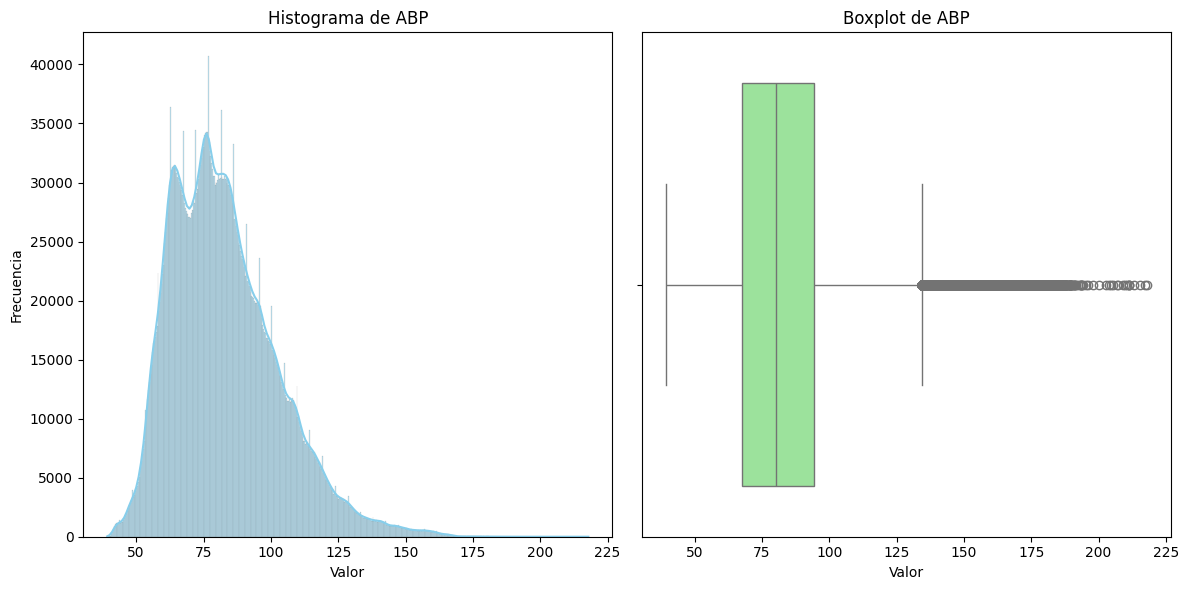

Estadísticas Descriptivas para CBFV:
count    4.775829e+06
mean     7.374405e+01
std      3.037728e+01
min      0.000000e+00
25%      5.190000e+01
50%      6.850000e+01
75%      9.130000e+01
max      2.887000e+02
dtype: float64



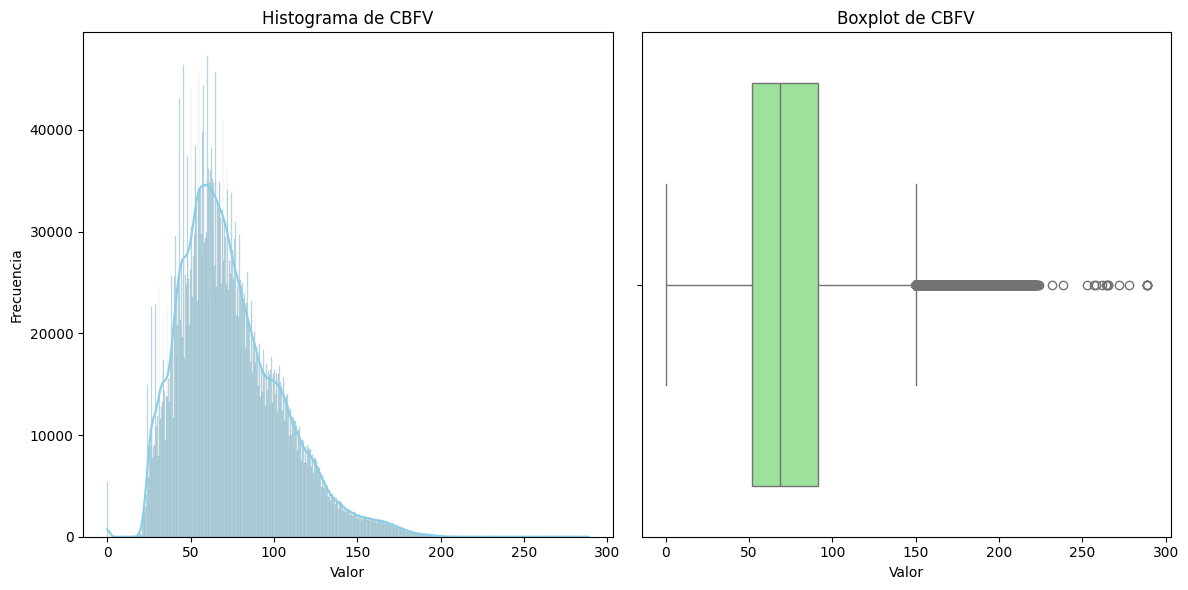

Estadísticas Descriptivas para ICP:
count    4.775829e+06
mean     1.054572e+01
std      4.310159e+00
min     -1.275000e+01
25%      7.562500e+00
50%      9.687500e+00
75%      1.318750e+01
max      1.114375e+02
dtype: float64



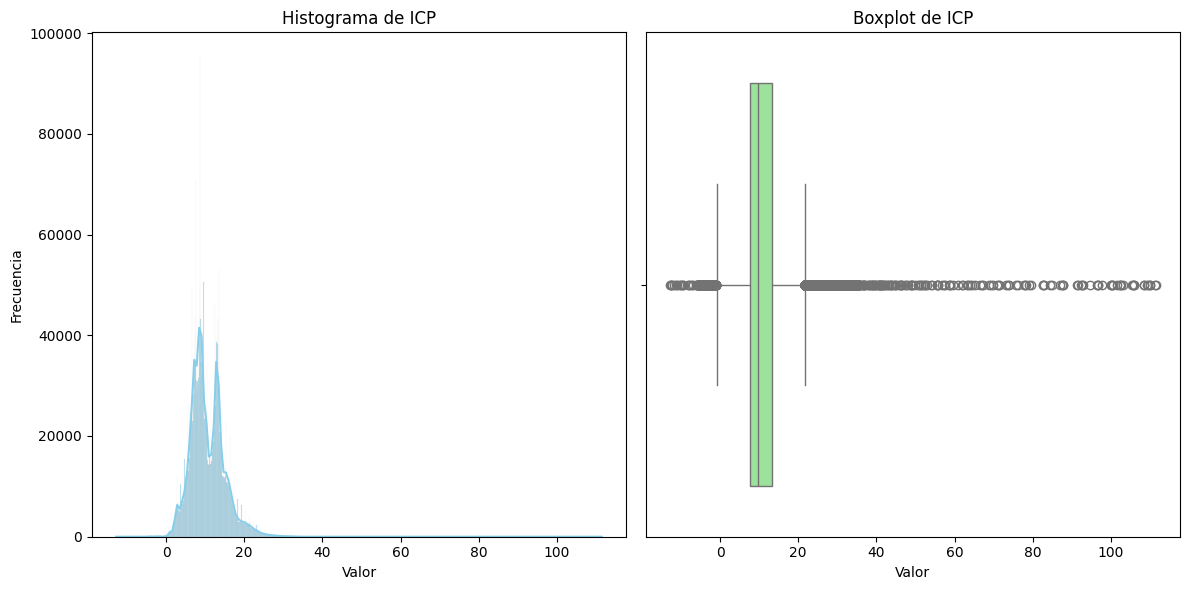

Matriz de Correlación:
           ABP      CBFV       ICP
ABP   1.00000 -0.177030  0.251240
CBFV -0.17703  1.000000 -0.110164
ICP   0.25124 -0.110164  1.000000


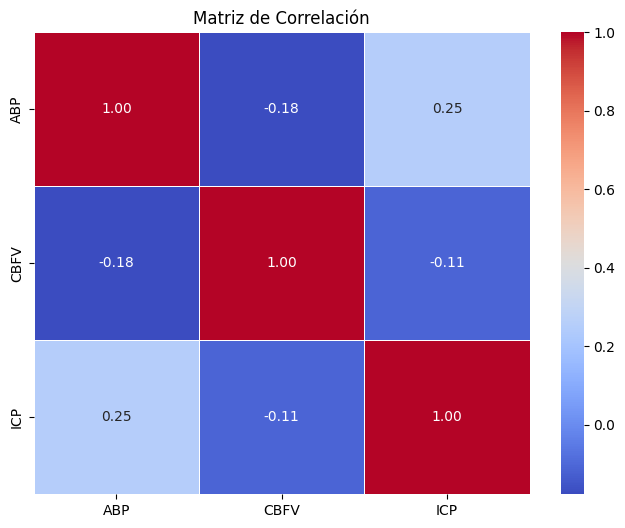

In [ ]:
# Suponiendo que `signals` es un diccionario con las señales ya preparadas
analyze_univariate_time_series(signals)
analyze_multivariate_time_series(signals)

# Extracción de segmentos

Patient12_Study02_LMCA_2
Patient10_Study02_LMCA_4
Patient12_Study02_LMCA_1
Patient12_Study04_LMCA_1
Patient12_Study04_LMCA_2
Patient12_Study03_LMCA_3
Patient12_Study04_LMCA_3
Patient10_Study03_LMCA_1
Patient13_Study01_LMCA_5
Patient10_Study02_LMCA_5
Patient10_Study03_LMCA_3
Patient10_Study02_LMCA_2
Patient10_Study02_LMCA_3
Patient10_Study03_LMCA_2
Patient10_Study01_LMCA_1
Patient13_Study01_RMCA_1
Patient10_Study02_LMCA_1
Patient10_Study03_LMCA_4
Patient12_Study03_LMCA_4
Patient12_Study03_LMCA_1
Patient13_Study02_LMCA_1
Patient18_Study02_LMCA_3
Patient01_Study02c_LMCA_5
Patient18_Study02_LMCA_2
Patient01_Study04_LMCA_2
Patient14_Study03_LMCA_1
Patient13_Study04_LMCA_1
Patient13_Study02_RMCA_1
Patient01_Study01_RMCA_3
Patient01_Study02d_LMCA_1
Patient14_Study02_RMCA_3
Patient14_Study01_RMCA_1
Patient01_Study02b_LMCA_4
Patient01_Study01_RMCA_1
Patient01_Study11_RMCA_2
Patient14_Study02_RMCA_2
Patient13_Study03_RMCA_2
Patient14_Study04_RMCA_2
Patient01_Study03_LMCA_3
Patient13_Study04_RMCA

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 0, 'Tiempo (s)')

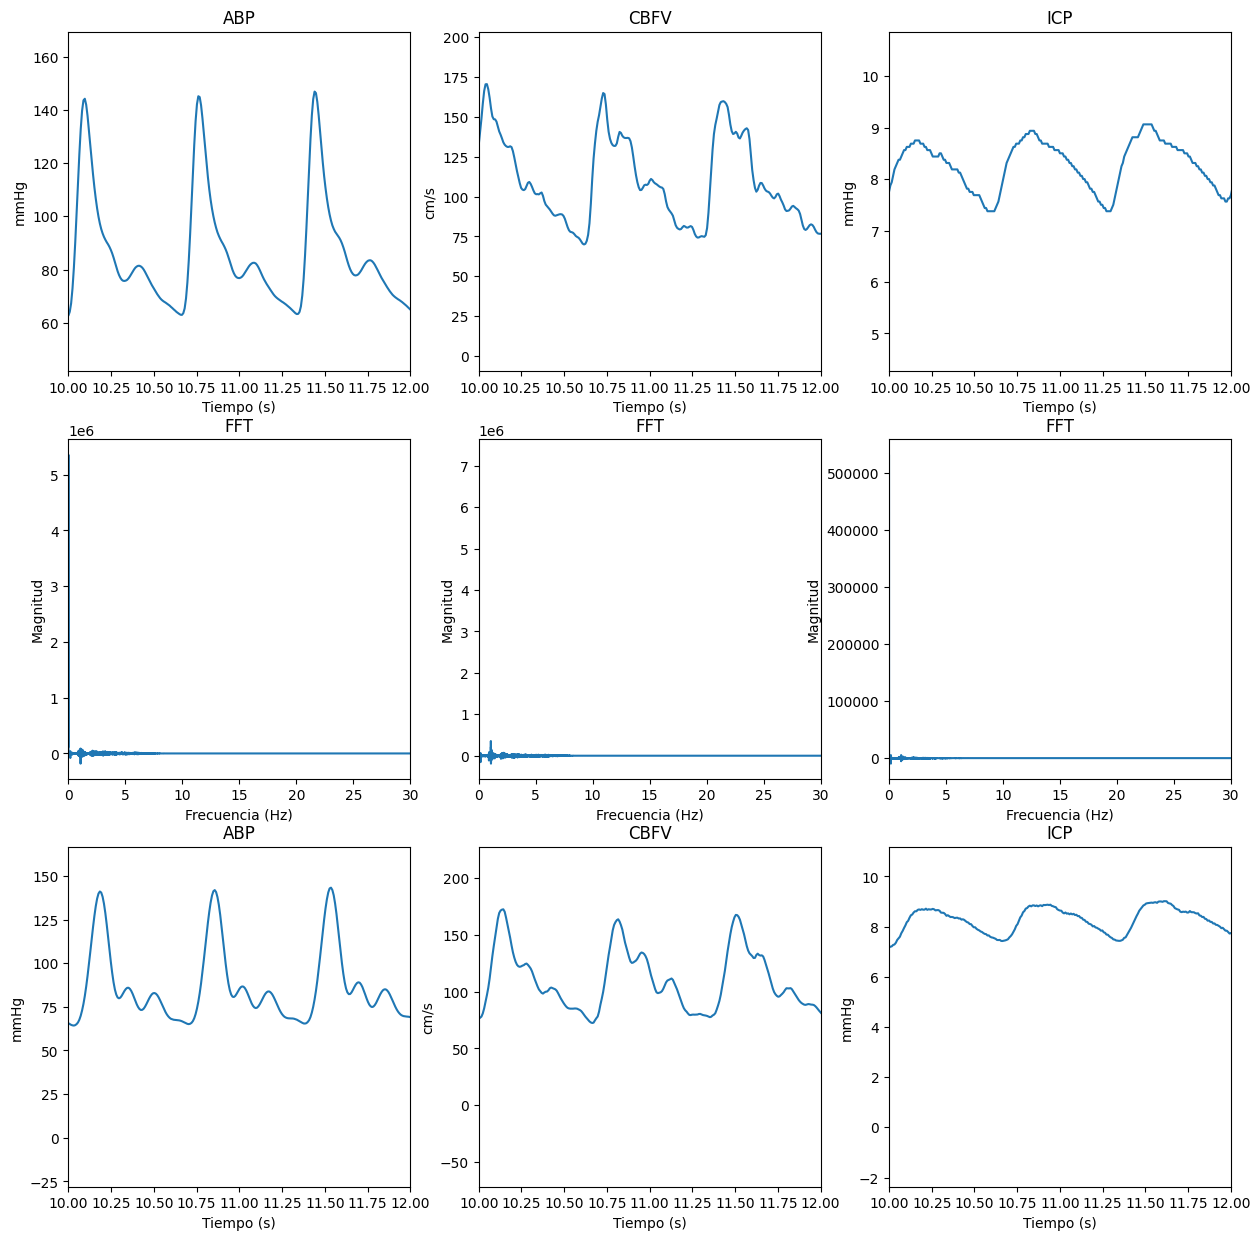

In [ ]:
import wfdb
import matplotlib.pyplot as plt
import numpy as np


segm_dict = {"ABP":[],"CBFV": [] ,"ICP":[]}

for i, record_name in enumerate(names):
    print(record_name)
    path = './dataset/waves/'
    record = wfdb.rdrecord(record_name=path+record_name)
    """
    if i==11:
        break
    """
    signal = record.p_signal
    cont = record.__dict__
    titles = cont["sig_name"]
    sig = cont["p_signal"]
    fs = cont["fs"]
    units = cont["units"]
    adc_gain = cont["adc_gain"]
    sig_l = cont["sig_len"]

    adj_sig = sig
    sig_dict = {titles[i]:adj_sig[:,i] for i in range(0,3)}
    units_dict = {titles[i]:units[i] for i in range(0,3)}

    filt_dict = {}
    for key, value in sig_dict.items():
        sig = value
        #filt_sig,_,_ = butter_bandpass_filter(sig, 0.5, 12.0, fs, order=6)
        filt_sig,_,_ = butter_bandpass_filter(sig, 7.0, 25.0, fs, order=6, filter_tp = 'stop')
        filt_dict[key] = filt_sig

    fft_dict = {}
    for key, value in filt_dict.items():
        sig = value
        X,f,w = fft(sig, fs)
        fft_dict[key] = X
    t_seg = 5
    N_seg = 5*fs


    # Aplicar filtro
    filtered_abp = butter_lowpass_filter(filt_dict["ABP"], cutoff=10, fs=125, order=2)

    # Detección de picos
    peaks, _ = find_peaks(filtered_abp, distance=50)  # 'distance' depende de la frecuencia cardiaca promedio

    for i, idx in enumerate(peaks[:-1]):
        seg_abp = filt_dict["ABP"][peaks[i]:peaks[i+1]]
        seg_cbfv = filt_dict["CBFV"][peaks[i]:peaks[i+1]]
        seg_icp = filt_dict["ICP"][peaks[i]:peaks[i+1]]
        segm_dict["ABP"].append(seg_abp)
        segm_dict["CBFV"].append(seg_cbfv)
        segm_dict["ICP"].append(seg_icp)

print(len(segm_dict["ABP"]))
print(len(segm_dict["ICP"]))
print(len(segm_dict["CBFV"]))

t = np.arange(0, sig_l/fs, 1/fs)
plt.figure(figsize=(15, 15))
plt.subplot(331)
plt.plot(t, sig_dict["ABP"]);plt.xlim([10, 12])
plt.title("ABP");plt.ylabel(units_dict["ABP"]);plt.xlabel("Tiempo (s)")
plt.subplot(332)
plt.plot(t, sig_dict["CBFV"]);plt.xlim([10, 12])
plt.title("CBFV");plt.ylabel(units_dict["CBFV"]);plt.xlabel("Tiempo (s)")
plt.subplot(333)
plt.plot(t, sig_dict["ICP"]);plt.xlim([10, 12])
plt.title("ICP");plt.ylabel(units_dict["ICP"]);plt.xlabel("Tiempo (s)")

plt.subplot(334)
plt.plot(f, fft_dict["ABP"]);plt.xlim([0,30])
plt.title("FFT");plt.ylabel("Magnitud");plt.xlabel("Frecuencia (Hz)")
plt.subplot(335)
plt.plot(f, fft_dict["CBFV"]);plt.xlim([0,30])
plt.title("FFT");plt.ylabel("Magnitud");plt.xlabel("Frecuencia (Hz)")
plt.subplot(336)
plt.plot(f, fft_dict["ICP"]);plt.xlim([0,30])
plt.title("FFT");plt.ylabel("Magnitud");plt.xlabel("Frecuencia (Hz)")

plt.subplot(337)
plt.plot(t, filt_dict["ABP"]);plt.xlim([10, 12])
plt.title("ABP");plt.ylabel(units_dict["ABP"]);plt.xlabel("Tiempo (s)")
plt.subplot(338)
plt.plot(t, filt_dict["CBFV"]);plt.xlim([10, 12])
plt.title("CBFV");plt.ylabel(units_dict["CBFV"]);plt.xlabel("Tiempo (s)")
plt.subplot(339)
plt.plot(t, filt_dict["ICP"]);plt.xlim([10, 12])
plt.title("ICP");plt.ylabel(units_dict["ICP"]);plt.xlabel("Tiempo (s)")

In [ ]:
fs

125

In [ ]:
import numpy as np
norm_segm_dict = {}
def normalize_data(data):
    normalized_data = []
    for sequence in data:
        mean = np.mean(sequence)
        std = np.std(sequence)
        if std != 0:
            normalized_sequence = (sequence - mean) / std
        else:
            normalized_sequence = sequence - mean
        normalized_data.append(normalized_sequence)
    return normalized_data

norm_segm_dict['ABP'] = normalize_data(segm_dict['ABP'])
norm_segm_dict['CBFV'] = normalize_data(segm_dict['CBFV'])
norm_segm_dict['ICP'] = normalize_data(segm_dict['ICP'])


In [ ]:
from keras.preprocessing.sequence import pad_sequences
import numpy as np

# Calcula la longitud de todas las secuencias
lengths = [len(seq) for seq in norm_segm_dict['ABP']]  # Asumiendo ABP como referencia; también puedes combinar las longitudes de CBFV y ICP si es necesario

# Usa el percentil 95 para determinar max_len
max_len = int(np.percentile(lengths, 95))

print("Longitud de padding seleccionada:", max_len)

# Asumiendo que has calculado max_len como se indicó antes
norm_segm_dict['ABP'] = pad_sequences(norm_segm_dict['ABP'], maxlen=max_len, dtype='float32', padding='post', truncating='post')
norm_segm_dict['CBFV'] = pad_sequences(norm_segm_dict['CBFV'], maxlen=max_len, dtype='float32', padding='post', truncating='post')
norm_segm_dict['ICP'] = pad_sequences(norm_segm_dict['ICP'], maxlen=max_len, dtype='float32', padding='post', truncating='post')

Longitud de padding seleccionada: 122


In [ ]:
from sklearn.model_selection import train_test_split

# Asumiendo que segm_dict['ICP'] es el target y se combinan ABP y CBFV como features
X = np.stack((norm_segm_dict['ABP'], norm_segm_dict['CBFV']), axis=-1)  # Forma: [num_samples, timesteps, num_channels]
y = norm_segm_dict['ICP']


y_or = segm_dict['ICP']

original_lengths = [len(seq) for seq in y_or]

In [ ]:
X_train, X_test, y_train, y_test,train_lengths, test_lengths = train_test_split(X, y,original_lengths, test_size=0.1, random_state=110)
X_train, X_val, y_train, y_val,train_lengths,val_lengths  = train_test_split(X_train, y_train,train_lengths, test_size=0.2, random_state=110)  # 0.25 x 0.8 = 0.2



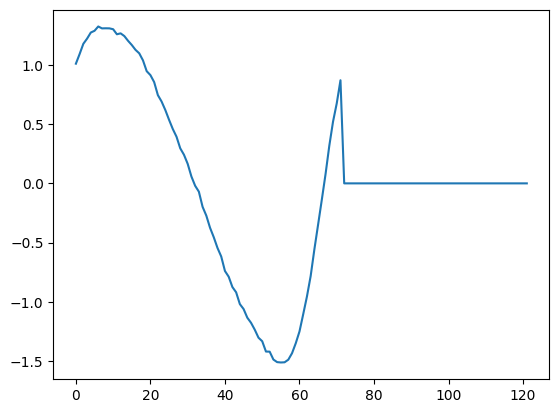

In [ ]:
plt.plot(norm_segm_dict['ICP'][3000])

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(38152, 122, 2)
(9539, 122, 2)
(5299, 122, 2)


In [ ]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(38152, 122)
(9539, 122)
(5299, 122)


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, TimeDistributed
from keras.callbacks import ReduceLROnPlateau
from keras.losses import Huber
# from keras.optimizers import Adam

model_lstm = Sequential([
    LSTM(100, input_shape=(max_len, 2), return_sequences=True),
    LSTM(50, return_sequences=True),  # Modificado para devolver secuencias
    TimeDistributed(Dense(1))  # Cada paso de tiempo tiene una salida propia
])
# loss=Huber(delta=1.0)
# optimizer=SGD(lr=0.01, momentum=0.9)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.00001, verbose=1)
# , callbacks=[reduce_lr]

#!pip install keras-contrib
#from keras_contrib.callbacks import CyclicLR
# clr = CyclicLR(base_lr=0.001, max_lr=0.006, step_size=2000., mode='triangular')
# , callbacks=[clr]

model_lstm.compile(optimizer='adam', loss=Huber(delta=1.0))
model_lstm.summary()

# Entrenamiento del modelo
history_lstm = model_lstm.fit(X_train, y_train, epochs=70, batch_size=64, validation_data=(X_val, y_val))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 122, 100)          41200     
                                                                 
 lstm_3 (LSTM)               (None, 122, 50)           30200     
                                                                 
 time_distributed_1 (TimeDi  (None, 122, 1)            51        
 stributed)                                                      
                                                                 
Total params: 71451 (279.11 KB)
Trainable params: 71451 (279.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/70
597/597 [==============================] - 15s 19ms/step - loss: 0.1150 - val_loss: 0.0974
Epoch 2/70
597/597 [==============================] - 12s 19ms/step - loss: 0.0901 - val_loss: 0.0826
Epoch 3/70

In [ ]:
loss = model_lstm.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

166/166 [==============================] - 1s 6ms/step - loss: 0.0391
Test Loss: 0.03910798579454422


166/166 [==============================] - 1s 5ms/step


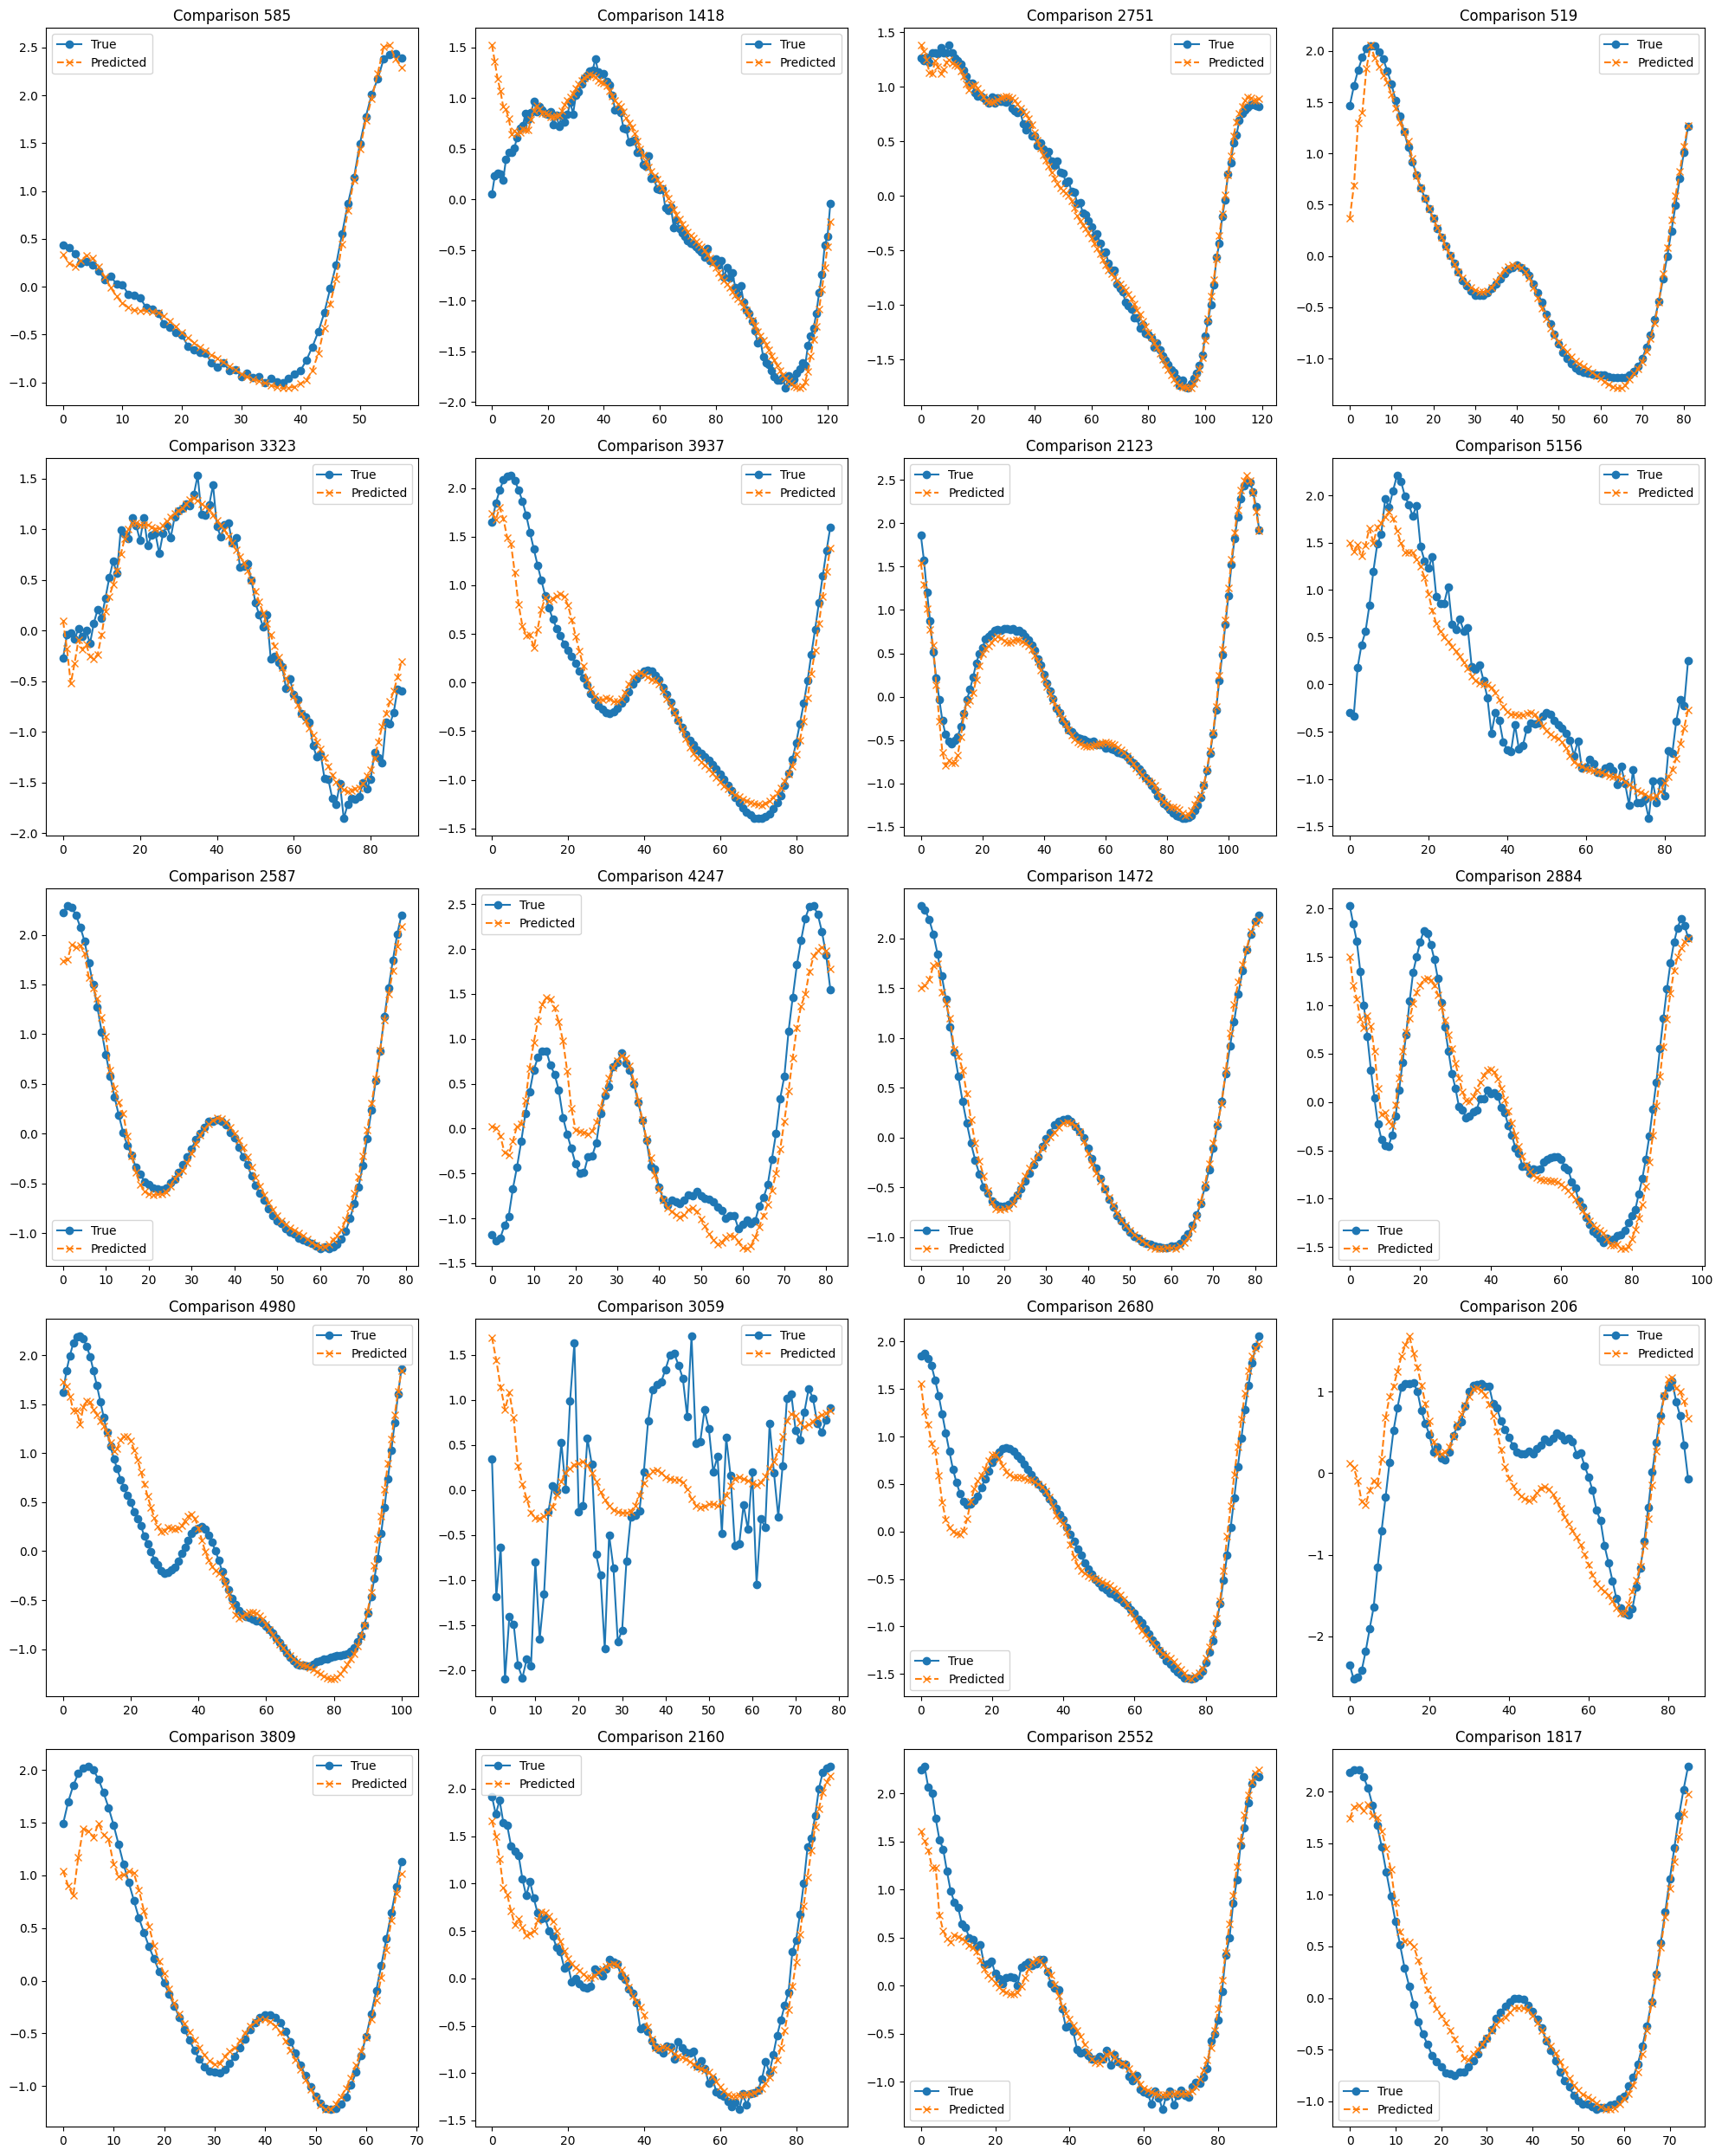

y_test shape: (5299, 122)
predictions shape: (5299, 122, 1)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener las predicciones del modelo
predictions = model_lstm.predict(X_test)

# Asegúrate de que test_lengths esté disponible y correctamente definido
# test_lengths = [...] # esto debería ser definido previamente si estás recortando resultados

# Recortar las predicciones y los valores verdaderos según las longitudes originales
predictions_trimmed = [pred[:length] for pred, length in zip(predictions, test_lengths)]
y_test_trimmed = [pred[:length] for pred, length in zip(y_test, test_lengths)]

# Seleccionar 20 índices aleatorios para mostrar
num_examples = 20
indices = np.random.choice(len(predictions_trimmed), num_examples, replace=False)

# Configurar la figura para mostrar múltiples subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 25))  # Ajusta el tamaño de la figura según necesidad
axes = axes.flatten()  # Aplanar el array de axes para una iteración más fácil

for idx, ax in zip(indices, axes):
    ax.plot(y_test_trimmed[idx], label='True', marker='o', linestyle='-')
    ax.plot(predictions_trimmed[idx], label='Predicted', marker='x', linestyle='--')
    ax.set_title(f'Comparison {idx+1}')
    ax.legend()

# Ajustar el layout para evitar la superposición de subplots
plt.tight_layout()
plt.show()

# Imprimir las dimensiones para referencia
print("y_test shape:", y_test.shape)
print("predictions shape:", predictions.shape)


In [ ]:
cbfv_means = np.array([np.mean(seq) for seq in segm_dict['CBFV']])
abp_means = np.array([np.mean(seq) for seq in segm_dict['ABP']])
icp_means = np.array([np.mean(seq) for seq in segm_dict['ICP']])

cbfv_std = np.array([np.std(seq) for seq in segm_dict['CBFV']])
abp_std = np.array([np.std(seq) for seq in segm_dict['ABP']])
icp_std = np.array([np.std(seq) for seq in segm_dict['ICP']])


[115.58648765 111.35758866 108.49067957 ...  68.71078596  69.07647574
  68.81327257]


In [ ]:
# Crear la matriz de características combinando medias y desviaciones estándar de ABP y CBFV
X_2 = np.column_stack((abp_means, abp_std, cbfv_means, cbfv_std))

# Crear la matriz de etiquetas con medias y desviaciones estándar de ICP
y_2 = np.column_stack((icp_means, icp_std))

In [ ]:

# Dividir los datos en entrenamiento y prueba
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y_2, test_size=0.1, random_state=115)
print("X_train shape:", X_train2.shape)
print("y_train shape:", y_train2.shape)
print("X_test shape:", X_test2.shape)
print("y_test shape:", y_test2.shape)


X_train shape: (47691, 4)
y_train shape: (47691, 2)
X_test shape: (5299, 4)
y_test shape: (5299, 2)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

def build_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_dim,)),
        Dense(64, activation='relu'),
        Dense(2)  # Salida: media y desviación estándar de ICP
    ])
    model.compile(optimizer='adam', loss='mse')  # Usar el error cuadrático medio como función de pérdida
    return model

# Supongamos que cada muestra de entrada tiene 4 características: media y std de ABP, media y std de CBFV
model = build_model(input_dim=4)
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                320       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 4610 (18.01 KB)
Trainable params: 4610 (18.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train2, y_train2, epochs=100, batch_size=32, validation_data=(X_test2, y_test2))


Epoch 1/100
1491/1491 [==============================] - 10s 6ms/step - loss: 7.7841 - val_loss: 6.3833
Epoch 2/100
1491/1491 [==============================] - 6s 4ms/step - loss: 6.3498 - val_loss: 5.8240
Epoch 3/100
1491/1491 [==============================] - 5s 3ms/step - loss: 5.9385 - val_loss: 5.6340
Epoch 4/100
1491/1491 [==============================] - 6s 4ms/step - loss: 5.7536 - val_loss: 5.3080
Epoch 5/100
1491/1491 [==============================] - 5s 3ms/step - loss: 5.6010 - val_loss: 5.5136
Epoch 6/100
1491/1491 [==============================] - 7s 4ms/step - loss: 5.4444 - val_loss: 5.4761
Epoch 7/100
1491/1491 [==============================] - 5s 3ms/step - loss: 5.3330 - val_loss: 5.0360
Epoch 8/100
1491/1491 [==============================] - 5s 3ms/step - loss: 5.2376 - val_loss: 5.0680
Epoch 9/100
1491/1491 [==============================] - 6s 4ms/step - loss: 5.1386 - val_loss: 5.2883
Epoch 10/100
1491/1491 [==============================] - 5s 3ms/step - 

166/166 [==============================] - 0s 2ms/step


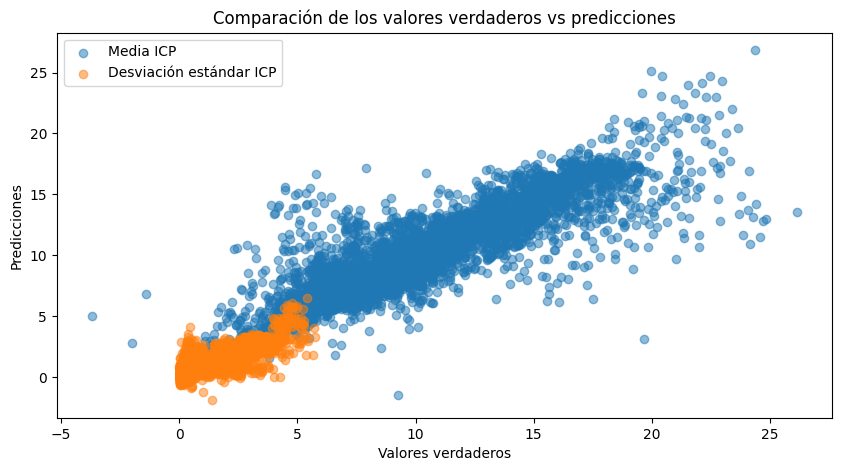

In [ ]:
import matplotlib.pyplot as plt

predictions = model.predict(X_test2)
plt.figure(figsize=(10, 5))
plt.scatter(y_test2[:, 0], predictions[:, 0], alpha=0.5, label='Media ICP')
plt.scatter(y_test2[:, 1], predictions[:, 1], alpha=0.5, label='Desviación estándar ICP')
plt.xlabel('Valores verdaderos')
plt.ylabel('Predicciones')
plt.title('Comparación de los valores verdaderos vs predicciones')
plt.legend()
plt.show()

2.053612298038299


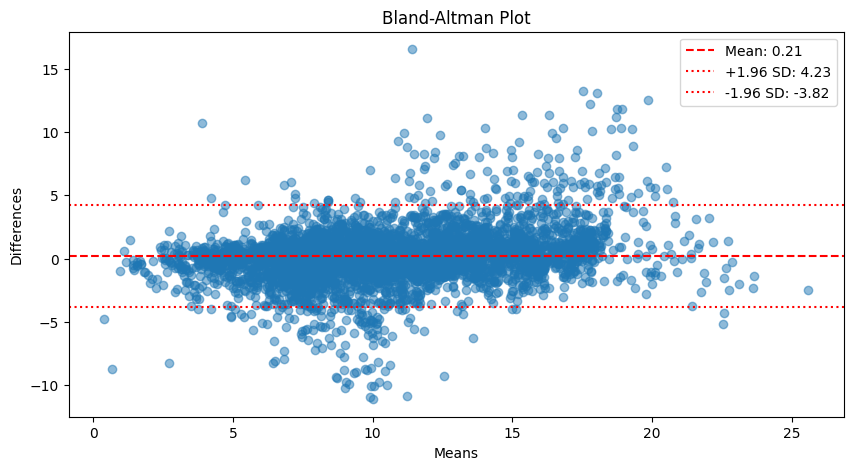

In [ ]:

# Calcular medias y diferencias
means = 0.5 * (y_test2[:, 0] + predictions[:, 0])
diffs = y_test2[:, 0] - predictions[:, 0]

# Valores para las líneas
mean_diff = np.mean(diffs)
std_diff = np.std(diffs)
upper_limit = mean_diff + 1.96 * std_diff
lower_limit = mean_diff - 1.96 * std_diff
print(std_diff)
# Plot Bland-Altman
plt.figure(figsize=(10, 5))
plt.scatter(means, diffs, alpha=0.5)
plt.axhline(mean_diff, color='red', linestyle='--', label=f'Mean: {mean_diff:.2f}')
plt.axhline(upper_limit, color='red', linestyle=':', label=f'+1.96 SD: {upper_limit:.2f}')
plt.axhline(lower_limit, color='red', linestyle=':', label=f'-1.96 SD: {lower_limit:.2f}')

plt.title('Bland-Altman Plot')
plt.xlabel('Means')
plt.ylabel('Differences')
plt.legend()
plt.show()



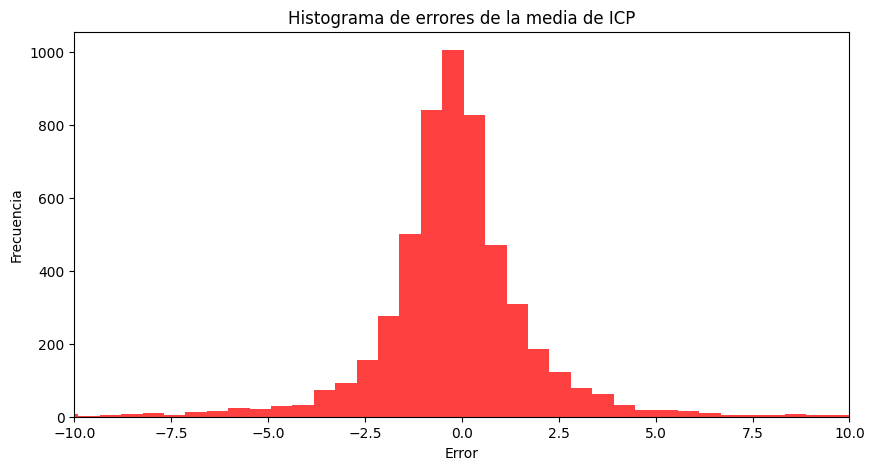

In [ ]:
plt.figure(figsize=(10, 5))
errors = predictions[:, 0] - y_test2[:, 0]
plt.hist(errors, bins=50, alpha=0.75, color='r')
plt.title('Histograma de errores de la media de ICP')
plt.xlabel('Error')
plt.ylabel('Frecuencia');plt.xlim([-10,10])
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae = mean_absolute_error(y_test2[:, 0], predictions[:, 0])
mse = mean_squared_error(y_test2[:, 0], predictions[:, 0])
r2 = r2_score(y_test2[:, 0], predictions[:, 0])

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R^2: {r2:.4f}")


MAE: 1.3370
MSE: 4.2594
R^2: 0.7413
